# Prétraitement des Données

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('vaccination_all_tweets.csv')
print('df info', df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29447 entries, 0 to 29446
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29447 non-null  int64 
 1   user_name         29447 non-null  object
 2   user_location     22597 non-null  object
 3   user_description  27387 non-null  object
 4   user_created      29447 non-null  object
 5   user_followers    29447 non-null  int64 
 6   user_friends      29447 non-null  int64 
 7   user_favourites   29447 non-null  int64 
 8   user_verified     29447 non-null  bool  
 9   date              29447 non-null  object
 10  text              29447 non-null  object
 11  hashtags          23240 non-null  object
 12  source            29425 non-null  object
 13  retweets          29447 non-null  int64 
 14  favorites         29447 non-null  int64 
 15  is_retweet        29447 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 3.2+ MB
df i

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
def remove_emojis(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [4]:
# réorganiser le dataframe avec les colonnes les plus pertinentes
df = df[['date', 'user_location', 'hashtags', 'text']]

# supprimer les lignes dont la colonne 'hashtags' est vide
df = df[df['hashtags'].notnull()]

# supprimer les identifiants twitter de la colonne text
df['text'] = df['text'].apply(lambda x:re.sub('@[^\s]+','',x))

# supprimer les  URLs de la colonne text
df['text'] = df['text'].apply(lambda x:re.sub(r"http\S+", "", x))

# supprimer les emojis des colonnes text et user_name
df['text'] = df['text'].apply(remove_emojis)

# supprimer les hashtags de la colonne text
df['text'] = df['text'].apply(lambda x:re.sub(r'\B#\S+','',x))

# supprimer les lignes avec un seul caractère dans la colonne text
df['text'] = df['text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# supprimer tous les caractères spéciaux de la colonne text
df['text'] = df['text'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

# remplacer les espaces multiples par un seul espace
df['text'] = df['text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# remplacer les valeurs vides de la colonne user_location par 'unknown'
df['user_location'].fillna('unknown', inplace=True)

# remplacer les valeurs 'Your Bed', 'planet EARTH', 'none', 'earth', 'global' de la colonne user_location par 'unknown'
df['user_location'] = df['user_location'].apply(lambda x:re.sub(r'Your Bed|planet EARTH|The World|earth|global|Kingdom of Heaven|Not Today |unknown Footprint|WorldWide', 'unknown', x, flags=re.I))

df.head()

,date,user_location,hashtags,text
0,2020-12-20 06:06:44,"La Crescenta-Montrose, CA",['PfizerBioNTech'],Same folks said daikon paste could treatcytoki...
2,2020-12-12 20:33:45,unknown,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Russian vaccine is created to last 2 4 years
4,2020-12-12 20:17:19,unknown,"['whereareallthesickpeople', 'PfizerBioNTech']",Explain to me again why we needvaccine
6,2020-12-12 20:06:00,"Austria, Ukraine and Kosovo",['vaccination'],it isbit sad to claim the fame for success of ...
7,2020-12-12 20:04:29,unknown,"['BidenHarris', 'Election2020']",There have not been many bright days in 2020 b...


In [5]:
# regrouper les locations du meme pays ensemble
def transform_to_canada(location):
    if isinstance(location, str) and ('Canada' in location or 'CA' in location or 'Toronto, Ontario' in location or 'Burlington, ON.' in location or 'Ontario' in location
        or 'Montreal' in location or 'Davenport, Toronto' in location):
        return 'Canada'
    return location
    
def transform_to_india(location):
    if isinstance(location, str) and ('India' in location or 'New Delhi' in location or 'Mumbai' in location or 'Delhi' in location):
        return 'India'
    return location
    
def transform_to_China(location):
    if isinstance(location, str) and ('China' in location or 'Beijing' in location or 'Hong Kong' in location or '北京, 中华人民共和国' in location):
        return 'China'
    return location

def transform_to_USA(location):
    if isinstance(location, str) and ('United States' in location or 'Washington, DC' in location or 'New York, NY' in location or 'California, USA' in location
        or 'New York NY' in location or 'Washington DC' in location  or 'Atlanta, GA' in location or 'Houston, TX' in location or 'USA🇺🇸' in location
        or 'Cranbury, NJ' in location or 'Medford, OR' in location or 'New Jersey, USA' in location or 'Rochester, NY' in location or 'New York' in location
        or 'Chicago, IL' in location or 'Los Angeles, CA' in location or 'San Francisco, CA' in location or 'Boston, MA' in location or 'Seattle, WA' in location
        or 'Dallas, TX' in location or 'Jefferson City, MO' in location or 'LI, NYC, NJ, PA, NE, USA' in location or 'New Orleans, LA' in location or 'Oregon, USA' in location
        or 'Minneapolis, MN' in location or 'Sacramento' in location or 'Texas' in location or 'DC, Baltimore, New Orleans' in location or 'Pennsylvania, USA' in location):
        return 'USA'
    return location

def transform_to_England(location):
    if isinstance(location, str) and ('England' in location or 'London, England' in location or 'London' in location or 'UK' in location or 'United Kingdom' in location
        or 'England, United Kingdom' in location or 'Nottingham' in location or 'Nottinghamshire, England' in location or 'Wales, United Kingdom' in location):
        return 'United Kingdom'
    return location
    
df['user_location'] = df['user_location'].apply(transform_to_canada)
df['user_location'] = df['user_location'].apply(transform_to_india)
df['user_location'] = df['user_location'].apply(transform_to_China)
df['user_location'] = df['user_location'].apply(transform_to_USA)
df['user_location'] = df['user_location'].apply(transform_to_England)
df['user_location'] = df['user_location'].replace(['United Arab Emirates', 'Dubai, United Arab Emirates'], 'United Arab Emirates')
df['user_location'] = df['user_location'].replace(['Moscow, Russia', 'Russia', 'Moscow, Russia '], 'Russian Federation')
df['user_location'] = df['user_location'].replace(['Brussels, Belgium', 'Brussels'], 'Belgium')

locations  = df['user_location'].unique()
print('locations shape', locations.shape)
x = df['user_location'].value_counts(ascending=False).head(10)
x


locations shape (4220,)


unknown                 5665
India                   2570
United Kingdom          1398
USA                     1274
Canada                   990
China                    776
Russian Federation       204
United Arab Emirates     130
Belgium                  123
Türkiye                  123
Name: user_location, dtype: int64

In [6]:
# Tokenisation, suppression des stop words et lemmatisation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_tweet(tweet):
    # Tokenisation
    words = word_tokenize(tweet.lower())
    
    # Suppression des stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

# appliquer la fonction preprocess_tweet à la colonne text pour créer une nouvelle colonne preprocessed_text
df['preprocessed_text'] = df['text'].apply(preprocess_tweet)

df.head()

,date,user_location,hashtags,text,preprocessed_text
0,2020-12-20 06:06:44,Canada,['PfizerBioNTech'],Same folks said daikon paste could treatcytoki...,folk said daikon paste could treatcytokine storm
2,2020-12-12 20:33:45,unknown,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Russian vaccine is created to last 2 4 years,russian vaccine created last 2 4 year
4,2020-12-12 20:17:19,unknown,"['whereareallthesickpeople', 'PfizerBioNTech']",Explain to me again why we needvaccine,explain needvaccine
6,2020-12-12 20:06:00,"Austria, Ukraine and Kosovo",['vaccination'],it isbit sad to claim the fame for success of ...,isbit sad claim fame success patriotic competi...
7,2020-12-12 20:04:29,unknown,"['BidenHarris', 'Election2020']",There have not been many bright days in 2020 b...,many bright day 2020 best 1 winning


In [7]:
# Utilisons VADER pour attribuer automatiquement des étiquettes de sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df['sentiment'] = ''
analyzer = SentimentIntensityAnalyzer()
for index, tweet in df.iterrows():
    sentiment_score = analyzer.polarity_scores(tweet['text'])
    if sentiment_score['compound'] >= 0.05:
        df.at[index, 'sentiment'] = 'positive'
    elif sentiment_score['compound'] <= -0.05:
        df.at[index, 'sentiment'] = 'negative'
    else:
        df.at[index, 'sentiment'] = 'neutral'

print('df info', df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23240 entries, 0 to 29446
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               23240 non-null  object
 1   user_location      23240 non-null  object
 2   hashtags           23240 non-null  object
 3   text               23240 non-null  object
 4   preprocessed_text  23240 non-null  object
 5   sentiment          23240 non-null  object
dtypes: object(6)
memory usage: 1.7+ MB
df info None


# Extraction de Caractéristiques et Construction de Modèle

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np


In [9]:
# remplacer les valeurs manquantes par des espaces
df['preprocessed_text'] = df['preprocessed_text'].replace(np.nan, '', regex=True)
df.info()

# Extraction de Caractéristiques
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['preprocessed_text']).toarray()
X.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23240 entries, 0 to 29446
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               23240 non-null  object
 1   user_location      23240 non-null  object
 2   hashtags           23240 non-null  object
 3   text               23240 non-null  object
 4   preprocessed_text  23240 non-null  object
 5   sentiment          23240 non-null  object
dtypes: object(6)
memory usage: 1.7+ MB


(23240, 1000)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=101)

In [11]:
# Construction d'un Modèle basé sur le SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7943201376936316


In [12]:
# construction d'un modèle basé sur le Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=101)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7962564543889845


In [13]:
# construction d'un modèle basé sur le XGBoost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
xgb_model = XGBClassifier()
# encode labels
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
xgb_model.fit(X_train, y_train)
predictions = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7932444061962134


In [14]:
# construction d'un modèle basé sur le CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenisation
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['preprocessed_text'])
word_index = tokenizer.word_index

# Padding
sequences = tokenizer.texts_to_sequences(df['preprocessed_text'])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Encoder les labels
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df['sentiment'])
labels = label_encoder.transform(df['sentiment'])

# Création du modèle
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

# Entrainement du modèle
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=101)
history = model_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

# Evaluation du modèle
predictions = model_cnn.predict(X_test)
predictions = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            5184      
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 169,539
Trainable params: 169,539
Non-trainable params: 0
__________________________________________________

# Analyse de Sentiment 

In [15]:

def predict_sentiment_with_svm(tweet):
    # Prétraitement du tweet
    preprocessed_tweet = preprocess_tweet(tweet)

    # Extraction de caractéristiques  # Transformation du tweet en vecteur avec le TfidfVectorizer
    features = tfidf_vectorizer.transform([preprocessed_tweet]).toarray()

    # Prédiction du sentiment avec le modèle SVM
    sentiment = svm_model.predict(features)
    return sentiment[0]


def predict_sentiment_with_cnn(tweet):
    # Prétraitement du tweet
    preprocessed_tweet = preprocess_tweet(tweet)

    # Transformation du tweet en séquence de nombres
    sequence = tokenizer.texts_to_sequences([preprocessed_tweet])

    # Padding
    sequence = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')

    # Prédiction du sentiment avec le modèle CNN
    sentiment = model_cnn.predict(sequence)
    sentiment = np.argmax(sentiment, axis=1)
    return label_encoder.inverse_transform(sentiment)[0]


# Test du modèle
tweet1 = "I had a fever after injecting the second dose of the Pfizer vaccine"
tweet2 = "I read on the internet that covid-19 vaccines cause serious side effects"
tweet3 = "I am very happy to be vaccinated against covid-19"
tweet4 = "I am not sure if the covid-19 vaccine is safe"
tweet5 = "I am not sure if the covid-19 vaccine is safe or not"
tweet6 = "I am not sure if the covid-19 vaccine is safe or not, but I am happy to be vaccinated"
tweet7 = "You still need to get vaccinated"
# print(predict_sentiment_with_cnn(tweet7))


# Prédictions des sentiments pour chaque tweet dans le DataFrame
df['predicted_sentiment'] = df['text'].apply(predict_sentiment_with_svm)


In [16]:
# Mapping des valeurs de la colonne predicted_sentiment
df['sentiment_score'] = df['predicted_sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})
df.head()


,date,user_location,hashtags,text,preprocessed_text,sentiment,predicted_sentiment,sentiment_score
0,2020-12-20 06:06:44,Canada,['PfizerBioNTech'],Same folks said daikon paste could treatcytoki...,folk said daikon paste could treatcytokine storm,neutral,neutral,0
2,2020-12-12 20:33:45,unknown,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Russian vaccine is created to last 2 4 years,russian vaccine created last 2 4 year,positive,neutral,0
4,2020-12-12 20:17:19,unknown,"['whereareallthesickpeople', 'PfizerBioNTech']",Explain to me again why we needvaccine,explain needvaccine,neutral,neutral,0
6,2020-12-12 20:06:00,"Austria, Ukraine and Kosovo",['vaccination'],it isbit sad to claim the fame for success of ...,isbit sad claim fame success patriotic competi...,positive,neutral,0
7,2020-12-12 20:04:29,unknown,"['BidenHarris', 'Election2020']",There have not been many bright days in 2020 b...,many bright day 2020 best 1 winning,positive,positive,1


# Visualisation des Résultats

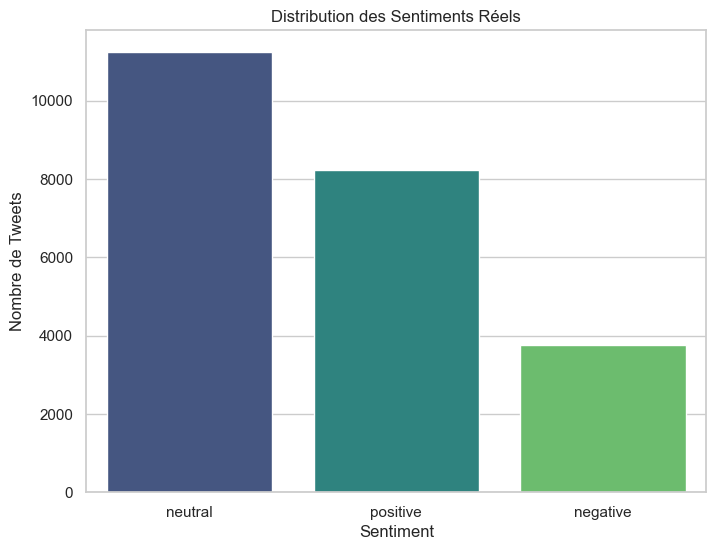

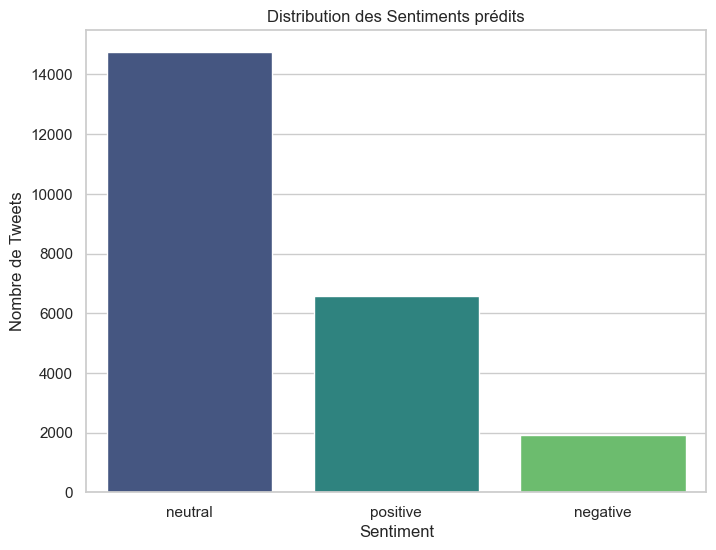

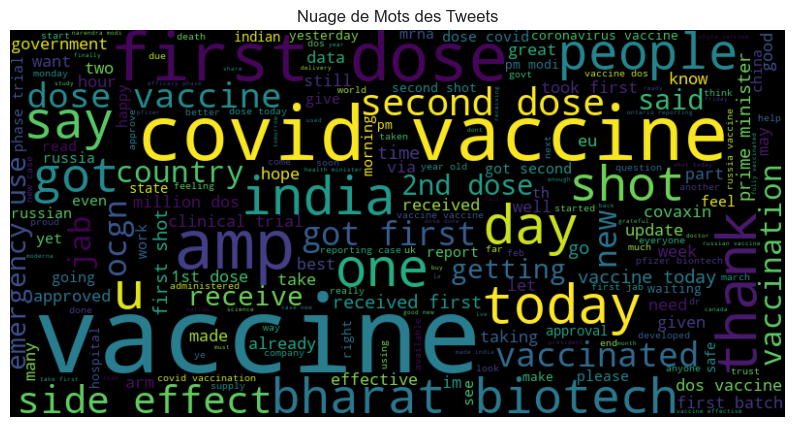

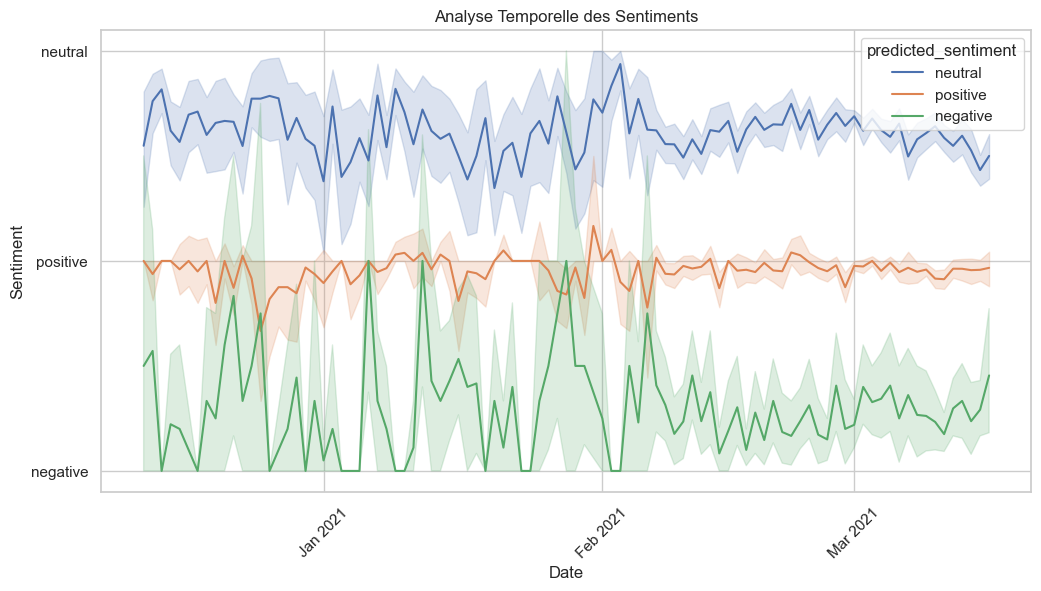

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.dates as mdates

# Distribution des sentiments réels
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution des Sentiments Réels')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Tweets')
plt.show()

# Distribution des sentiments prédits
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='predicted_sentiment', data=df, palette='viridis')
plt.title('Distribution des Sentiments prédits')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Tweets')
plt.show()


# Nuage de Mots des Tweets
text = ' '.join(df['preprocessed_text'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='black').generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nuage de Mots des Tweets')
plt.show()


# Analyse temporelle des sentiments
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sentiment', hue='predicted_sentiment', data=df)
plt.title('Analyse Temporelle des Sentiments')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

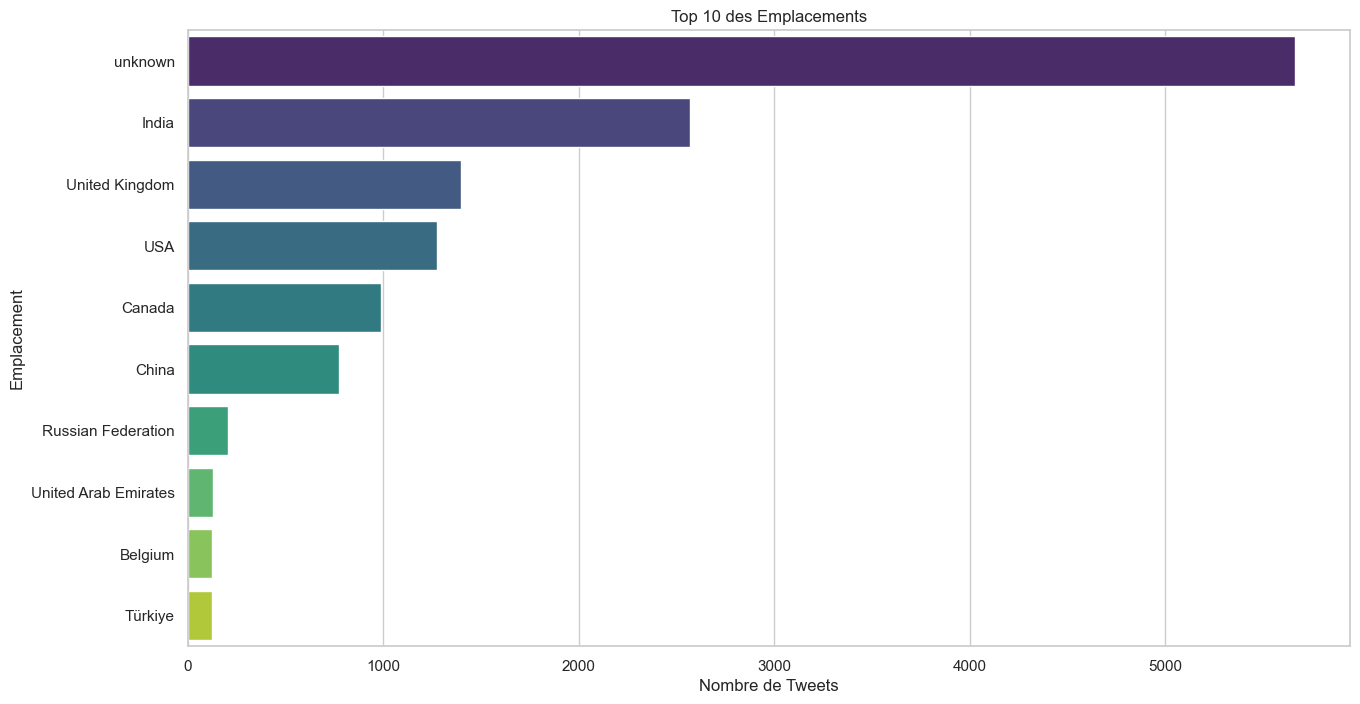

In [20]:
# créer un barplot classé des 10 premiers emplacements
plt.figure(figsize=(15, 8))
sns.barplot(x=df['user_location'].value_counts(ascending=False).head(10).values, y=df['user_location'].value_counts(ascending=False).head(10).index, palette='viridis')
plt.title('Top 10 des Emplacements')
plt.xlabel('Nombre de Tweets')
plt.ylabel('Emplacement')
plt.show()


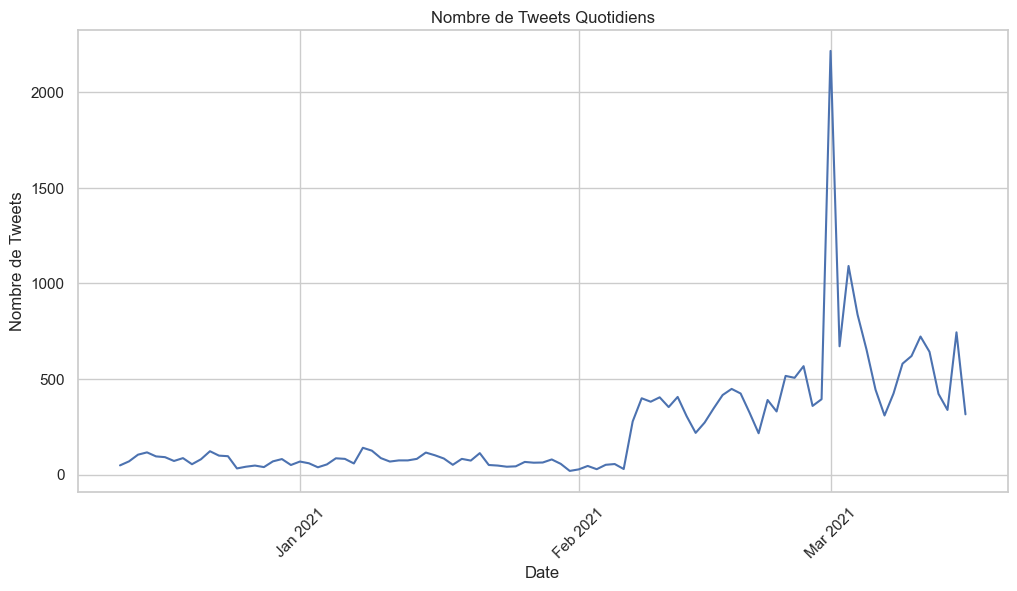

In [19]:
# nombre de tweets quotidiens
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date
daily_tweets = df.groupby('date').size().reset_index(name='counts')

# créer un graphique de ligne pour le nombre de tweets quotidiens
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='counts', data=daily_tweets)
plt.title('Nombre de Tweets Quotidiens')
plt.xlabel('Date')
plt.ylabel('Nombre de Tweets')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()


In [ ]:
# créer un barplot classé des 20 premiers hashtags
hashtags_list = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]
print('Nombre de hashtags:', len(hashtags_list))

# Count the occurrences of each hashtag and Create a bar plot
hashtags_count = pd.Series(hashtags_list).value_counts().head(20)
plt.figure(figsize=(15, 8))
sns.barplot(x=hashtags_count.values, y=hashtags_count.index, palette='viridis')
plt.title('Top 20 Hashtags')
plt.xlabel('Nombre de Tweets')
plt.ylabel('Hashtags')
plt.show()